# Image란?

## Image는 width X height X channel 의 pixels로 이루어진 matrix

- width: 너비로 이미지의 가로 길이를 의미한다.
- height: 높이로 이미지의 세로 길이를 의미한다.

- pixel: image가 가지고 있는 값으로 width X height 개수만큼 존재한다. image를 표현하는 bit방식에 따라 값의 범위가 달라진다.

- 일반적인 Image는 unsigned integer 8bit로 표현
    - 0 ~ 255 로 표현
- bit수가 높아질 수록 표현할 수 있는 색의 범위가 증가한다.   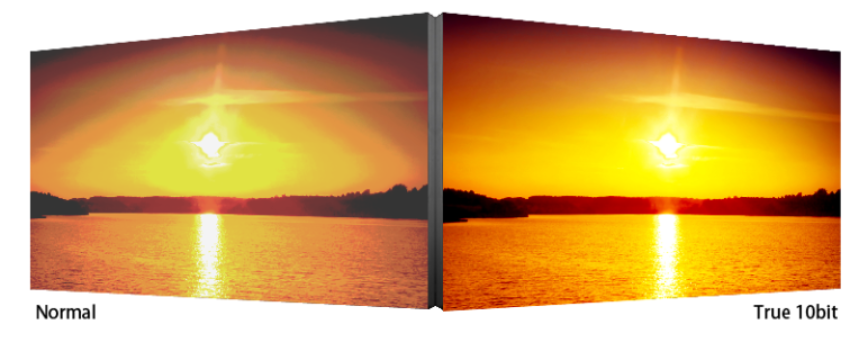

# Open CV 개요
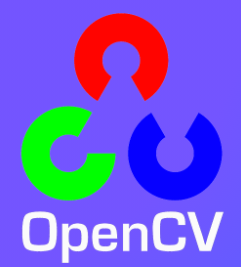

- https://opencv.org/
- 튜토리얼: https://docs.opencv.org/master/
- Open Source Computer Vision Library로 실시간 computer vision을 목적으로 개발됨
- Intel에서 개발하다가 open source화 됨
- Cross Platform이기 때문에 Windows, Mac, Linux, OS에 상관없이 동작 가능
- C/C++로 개발 되었으나 Python, JAVA, MATLAB의 개발 환경도 지원한다.
- 실시간에 초점을 맞추고 나온 library이기 때문에 mobile camera나 로봇 등에 recognition module로 붙여 영상처리에 활용된다.

# OpenCV 설치

- `!pip install opencv-contrib-python`

In [1]:
import cv2

# 이미지 읽기
- **`imread(filename [, flag]) : ndarray`**
    - 이미지를 읽는다.
        
    - filename: 읽어들일 이미지 파일경로
    - flag: 읽기 모드
        - cv2.IMREAD_XXXXX 상수를 이용한다.
        - IMREAD_COLOR가 기본(BGR 모드)
            - matplotlib에서 출력시 rgb 모드로 변환해야 한다.

### matplotlib 으로 출력
- jupyter notebook 내에 출력이 가능

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 이미지 읽기
img1 = cv2.imread('images/penguin.jpg')
# img1 = cv2.imread('images/penguin.jpg', cv2.IMREAD_GRAYSCALE)
print(type(img1))
print(img1.shape)  # (height, width, channel) => channel: 3 => color, 1: grayscale(흑백)

<class 'numpy.ndarray'>
(222, 296, 3)


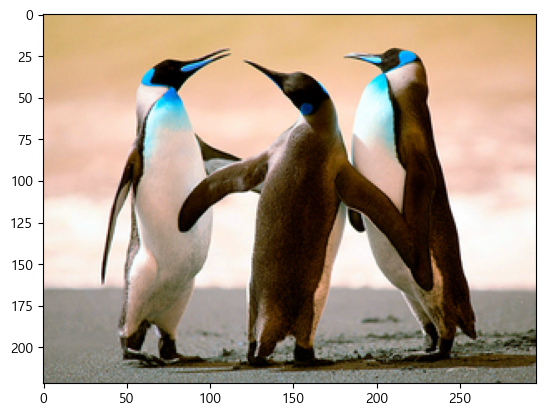

In [9]:
plt.imshow(img1)#, cmap='gray')
plt.show()

In [10]:
# open cv 이미지 출력
cv2.imshow("window", img1)  # ("창이름", 이미지배열)
cv2.waitKey(0)  # 최대 입력 대기 시간(단위: 밀리초-1/1000), 0: 입력될때 까지 대기.
cv2.destroyAllWindows()  # 이미지를 출력하는 윈도우(창)을 모두 닫는다.

In [11]:
a

108

## 색공간 변환
- **`cv2.cvtColor(src, code)`**
    - image 의 color space를 변환한다. 
    - src: 변환시킬 이미지 (ndarray)
    - code
        - 변환시킬 색공간 타입 지정
        - cv2.COLOR_XXX**2**YYY 형태의 상수 지정(XXX를YYY로 변환)
            - cv2.COLOR_XXX2YYY 형태의 상수 지정(XXX를YYY로 변환)
            - cv2.COLOR_BGR2GRAY / cv2.COLOR_GRAY2BGR (BGR <-> GRAY)
            - cv2.COLOR_BGR2RGB  / cv2.COLOR_RGB2BGR  (BGR <-> RGB)
            - cv2.COLOR_BGR2HSV  / cv2.COLOR_HSV2BGR  (BGR <-> HSV)

> ### HSV
> - Hue: 색상, 색의 종류
> - Saturation: 채도. 색의 선명도
> - Value : 명도. 밝기

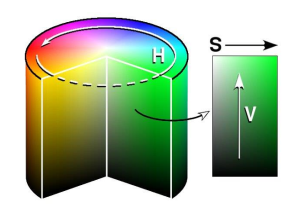
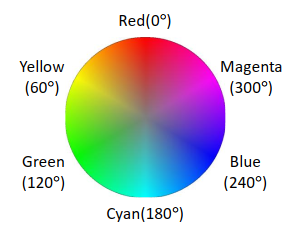

In [11]:
# img1(bgr mode) ===> rgb mode로 변환
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # (대상, flag)

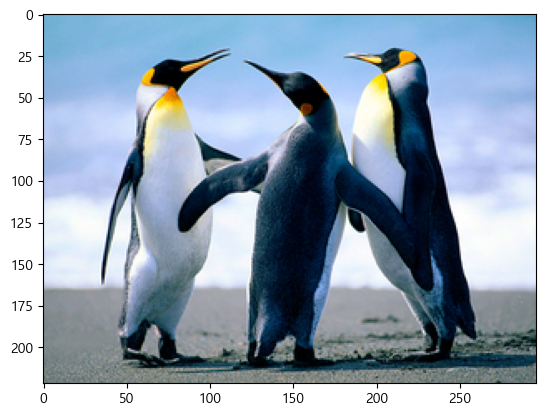

In [12]:
plt.imshow(img2)
plt.show()

In [6]:
cv2.imshow('frame', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

(222, 296)


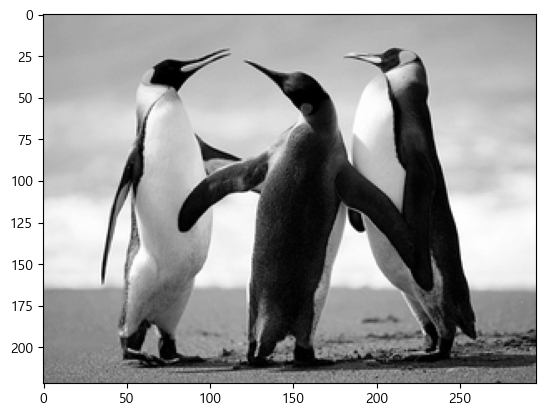

In [8]:
img3_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)  # bgr --> gray scale(흑백)
print(img3_gray.shape) # gray scale은 2차원 (height, width)
plt.imshow(img3_gray,  cmap='gray')
plt.show()

In [9]:
cv2.imshow('frame_gray', img3_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 채널 확인
- 채널별로 나눠 이미지 출력

In [13]:
img1 = cv2.imread('images/lenna.bmp')
# bgr: (222, 296, 3)
blue = img1[:, :, 0]
green = img1[:, :, 1]
red  = img1[:, :, 2]
print(blue.shape, green.shape, red.shape)

(512, 512) (512, 512) (512, 512)


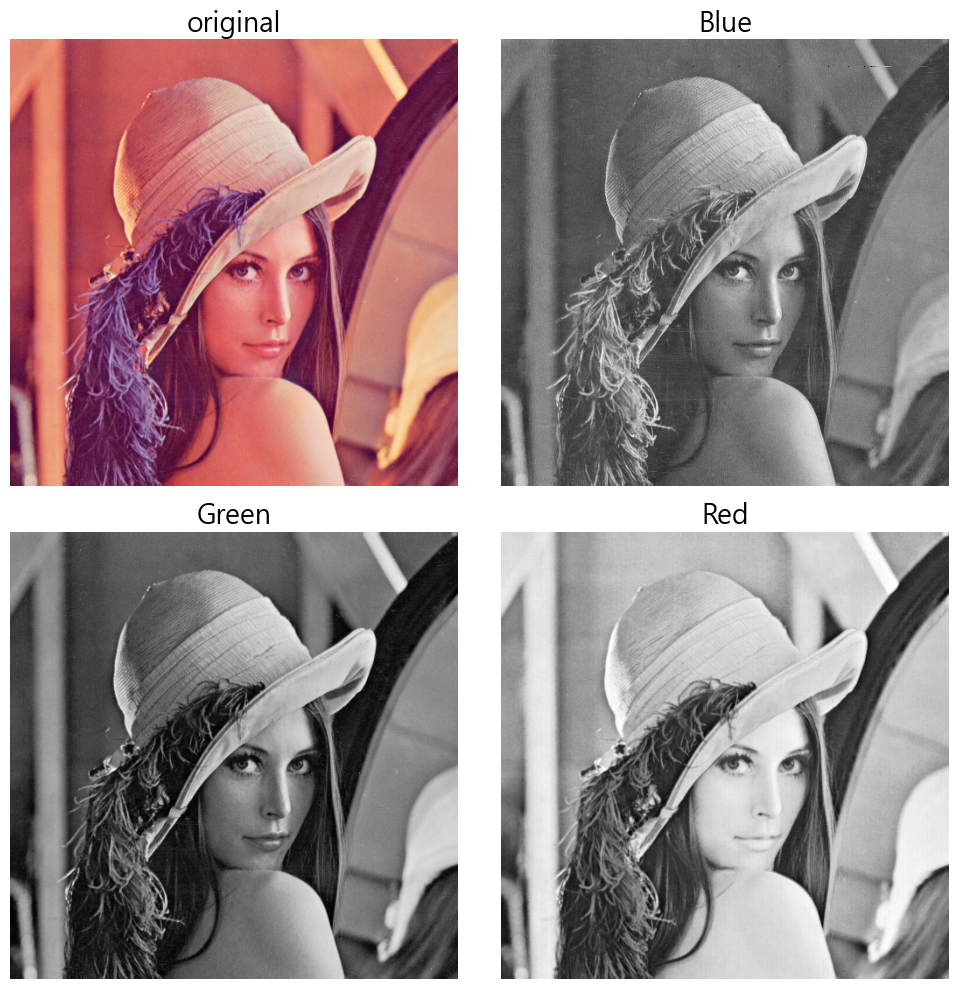

In [14]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.title('original', fontsize=20)
plt.imshow(img1[:, :, ::-1])
# plt.xticks([])
# plt.yticks([])
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Blue', fontsize=20)
plt.imshow(blue, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Green', fontsize=20)
plt.imshow(green, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Red', fontsize=20)
plt.imshow(red, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
img1.dtype

dtype('uint8')

## cv2에서 이미지 출력
- **`cv2.imshow(winname, mat)`**
    - 창을 띄워 이미지를 출력한다.
    - winname: 창 이름
        - 창이름이 같으면 같은 창에 띄운다.
    - mat: 출력할 이미지(ndarray)
        - dtype이 uint8이어야 정상 출력된다. (float일 경우 255를 곱해서 출력한다.)
- **`cv2.imwrite(filename, img): bool`**
    - 이미지 파일로 저장
    - filename: 저장할 파일경로
    - img: 저장할 이미지(ndarray)

In [16]:
img1 = cv2.imread('images/penguin.jpg')
img2 = cv2.imread('images/lenna.bmp')
img3 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
print(img1.shape, img2.shape, img3.shape)
print(img1.dtype, img2.dtype, img3.dtype)

(222, 296, 3) (512, 512, 3) (222, 296)
uint8 uint8 uint8


In [17]:
cv2.imshow('frame1', img1)
cv2.waitKey(0)

cv2.imshow('frame2', img2)
cv2.waitKey(0)

cv2.imshow('frame3', img3)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [18]:
cv2.imshow('frame', img1)
cv2.waitKey(0)

cv2.imshow('frame', img2)
cv2.waitKey(0)

cv2.imshow('frame', img3)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [35]:
cv2.imshow('frame', img3)
# 특정 문자(q)를 입력받았을때 꺼지도록 처리.
while True:
    if cv2.waitKey(0) == ord('q'):   # 27 (esc)
        break

cv2.destroyAllWindows()

In [34]:
ord('q')

113

In [37]:
# 파일로 저장
save_path = 'images/penguin_gray.jpg'
# save_path = 'ims/penguin_gray.jpg'
cv2.imwrite(save_path, img3)

False

# 동영상 처리

## 동영상 읽기
- VideoCapture 클래스사용
    - 객체 생성
        - VideoCapture('동영상파일 경로'): 동영상파일
        - VideoCapture(웹캠 ID): 웹캠
- VideoCapture의 주요 메소드
    - isOpened(): bool
        - 입력 대상과 연결되었는지 여부반환
    - read(): (bool, img)
        - Frame 이미지로 읽기
        - 반환값
            - bool: 읽었는지 여부
            - img: 읽은 이미지(ndarray)

#### 웹캠

In [48]:
import cv2

cap = cv2.VideoCapture(0)  # 정수: web 캠 연결. => 0 부터 1씩 증가하는 값을 사용. 웹캠이 여러개인 경우 지정.
print(cap.isOpened())
while True:
    # 한개 Frame을 읽기
    success, image = cap.read()
    if not success:
        print('프레임을 읽어오지 못함')
        break  # 종료
    
    # 읽은 Frame을 출력
    image = cv2.flip(image, 1)   # 양수: 수평반전, 0: 수직반전, 음수: 수평/수직 모두 반전
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # BGR -> GRAY SCALE
    cv2.imshow('frame', image)
    if cv2.waitKey(1) == 27: # 27: esc key => 종료
        break

cap.release()  # 연결 닫기(해제)
cv2.destroyAllWindows()

True


# TODO: 웹캠에서 입력된 이미지를 화면에 보여주면서 파일로 저장
- 30장당 한장씩 저장한다.
- 파일형식: output_capture/cap_번호.jpg 

In [52]:
# 저장 디렉토리 생성
import os
import cv2
save_dir = 'output_capture'
os.makedirs(save_dir, exist_ok=True)

# VideoCapture객체 생성
cap = cv2.VideoCapture(0)
cnt = 0 # 몇번째 frame/반복 인지를 저장할 변수
while True:
    # 이미지 읽기
    success, image = cap.read()
    if not success:
        print('캡처 실패')
        break  #종료
        
    # 좌우(수평) 반전
    image = cv2.flip(image, 1)
    cv2.imshow('frame', image)
    
    # 파일에 저장
    if cnt % 30 == 0:
        file_path = os.path.join(save_dir, f'cap_{cnt}.jpg')
        cv2.imwrite(file_path, image)
    cnt += 1
    
    if cv2.waitKey(1) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [51]:
cnt

0

#### 동영상파일

FPS (Frame Per Second) - 1초에 몇 Frame을 보여주는지. 동영상 파일에 설정되있다.   
동영상파일의 FPS에 맞춰서(속도를 맞춰서) 플레이 하려면 한 Frame을 보여주고 FPS 맞는 시간간격만큼 기다려야 한다.
- 기다리는 시간: 초/FPS


In [28]:
cap_tmp = cv2.VideoCapture("images/wave.mp4")#cv2.VideoCapture(0)
FPS = cap_tmp.get(cv2.CAP_PROP_FPS)
DELAY1 = 1/FPS  # 1 Frame을 보여줄 시간
DELAY2 = 1000/FPS
print(FPS, f"{DELAY1}초, {DELAY2}밀리초")
cap_tmp.release()

29.97002997002997 0.03336666666666667초, 33.36666666666667밀리초


In [31]:
import cv2
# VideoCapture 객체 생성 => 동영상파일 경로를 문자열로 전달.
cap = cv2.VideoCapture("images/wave.mp4") # 정수: web cam 연결, 문자열: 동영상파일 연결
print("연결성공여부:", cap.isOpened())

FPS = cap.get(cv2.CAP_PROP_FPS)
DELAY = int(1000/FPS)  # waitKey()는 int값을 대기시간으로 받는다.

while cap.isOpened():
    success, image = cap.read()  # 한 Frame 읽기
    if not success:
        print('읽기 실패')
        break #종료
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', image)
    if cv2.waitKey(DELAY) == 27:
        break


cap.release() #연결 닫기(끊기)
cv2.destroyAllWindows() 

연결성공여부: True


### 동영상 저장
- capture(read)한 이미지 프레임을 연속적으로 저장하면 동영상 저장이 된다.
- VideoWriter 객체를 이용해 저장
    - **`VideoWriter(filename, codec, fps, size)`**
        - filename: 저장경로
        - codec
            - VideoWriter_fourcc 이용
            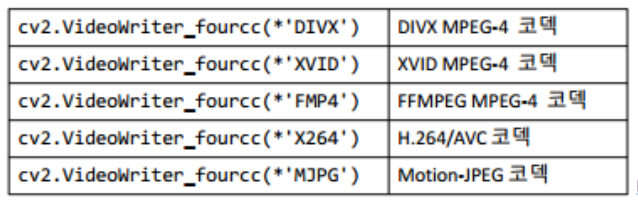
        - fps
            - FPS (Frame Per Second) - 초당 몇 프레임인지 지정
        - size
            - 저장할 frame 크기로 원본 동영상이나 웹캠의 width, height 순서로 넣는다.
    - `VideoWriter().write(img)`
        - Frame 저장

In [48]:
def func(*args, **kwargs):
    print(args, type(args), len(args))
    print(kwargs)
    
# func(1, 2, 3, 4, 5, 'a', 'b', 'c')
a = [1,2,3,4,5]  # iterable
b = dict(a=1, b=2, c=3)

# func(*a)
# func(*"가나다라마바사")
# func(*'DIVX')
# func('D', 'I', 'V', 'X')

func(*a, **b)

(1, 2, 3, 4, 5) <class 'tuple'> 5
{'a': 1, 'b': 2, 'c': 3}


In [51]:
# 웹캠에서 읽은 동영상을 파일로 저장
import cv2

cap = cv2.VideoCapture(0)
# 입력 영상의 size
_, img = cap.read()
# print(img.shape)
size = (img.shape[1], img.shape[0])  # width, height
# print(size)
codec = cv2.VideoWriter_fourcc(*"MJPG")
FPS = cap.get(cv2.CAP_PROP_FPS)
filepath = "webcam_output.avi"

# VideoWriter 객체 생성
writer = cv2.VideoWriter(filepath, codec, FPS, size)

while True:
    success, image = cap.read()
    if not success:
        print('캡쳐실패')
        break
        
    cv2.imshow('frame', image)
    writer.write(image)
    if cv2.waitKey(1) == 27:
        break

cap.release()
writer.release()
cv2.destroyAllWindows()